In [1]:
"""
Purpose:
To build the datajoint table that will MAP process the neurons
that have at least one soma

Pseudocode:
key soruce: sxtract all segments that have at least one soma

For each valid segment:
1) Download the soma mesh data
2) Run the MAP processing
3) Save the condensed file in datajoint

"""

'\nPurpose:\nTo build the datajoint table that will MAP process the neurons\nthat have at least one soma\n\nPseudocode:\nkey soruce: sxtract all segments that have at least one soma\n\nFor each valid segment:\n1) Download the soma mesh data\n2) Run the MAP processing\n3) Save the condensed file in datajoint\n\n'

In [2]:
import numpy as np
import datajoint as dj
from tqdm.notebook import tqdm
from pathlib import Path

In [3]:
import minfig

minnie = minfig.configure_minnie(return_virtual_module=True)
m65 = dj.create_virtual_module('m65', 'microns_minnie65_01')
schema = dj.schema("microns_minnie65_01")
dj.config["enable_python_native_blobs"] = True

Connecting celiib@10.28.0.34:3306


In [8]:
from os import sys
sys.path.append('/meshAfterParty/')

# Exploring Schema

In [14]:
minnie.DecimationConfig()

version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses)
0,0.10
0,0.25


In [16]:
minnie.Mesh()

segment_id segment id unique within each Segmentation,n_vertices number of vertices,n_faces number of faces,mesh in-place path to the hdf5 mesh file
72347797059274433,2794,5192,=BLOB=
72489015583974589,3625,6610,=BLOB=
72489634059263423,2414,4536,=BLOB=
72489771498209954,1364,2408,=BLOB=
72557872566766404,15849,27758,=BLOB=
72558422322577481,1923,2838,=BLOB=
72558972078398291,13643,22750,=BLOB=
72627554116173963,2504,5128,=BLOB=
72628241243834220,7685,13290,=BLOB=
72628241310954582,2261,4210,=BLOB=


In [13]:
minnie.Decimation()

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
72347797059274433,0,0.25,595,1298,=BLOB=
72489015583974589,0,0.25,800,1652,=BLOB=
72489634059263423,0,0.25,545,1134,=BLOB=
72489771498209954,0,0.25,287,602,=BLOB=
72558422322577481,0,0.25,338,708,=BLOB=
72558972078398291,0,0.25,2703,5686,=BLOB=
72627554116173963,0,0.25,581,1282,=BLOB=
72628241243834220,0,0.25,1519,3322,=BLOB=
72628241310954582,0,0.25,486,1052,=BLOB=
72628447469385540,0,0.25,366,760,=BLOB=


In [20]:
import numpy as np
np.str(np.round(np.exp(12)).astype(np.int))

'162755'

In [23]:
segments = (minnie.Mesh() & f'n_vertices  > {np.str(np.round(np.exp(12)).astype(np.int))}' & f'n_vertices  < {np.str(np.round(np.exp(15)).astype(np.int))}')
segments

segment_id segment id unique within each Segmentation,n_vertices number of vertices,n_faces number of faces,mesh in-place path to the hdf5 mesh file
73192496934525087,263464,500764,=BLOB=
73404771398417561,197416,373712,=BLOB=
73473215997272920,166359,315798,=BLOB=
73543378515619332,287589,547818,=BLOB=
73544203216881449,185626,356436,=BLOB=
73548876073768090,356013,678190,=BLOB=
73615190369126640,457614,872496,=BLOB=
73685696619348325,440096,851968,=BLOB=
73691056805396186,165663,315586,=BLOB=
73754278724137980,216891,424918,=BLOB=


In [29]:
dict(ex_key,
    new_column="hi")

{'segment_id': 72347797059274433,
 'version': 0,
 'decimation_ratio': 0.25,
 'new_column': 'hi'}

In [28]:
minnie.BaylorSegmentCentroidSeg3()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,soma_vertices array of vertices,soma_faces array of faces,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,run_time the amount of time to run (seconds)
73192496934525087,0,0.25,1,71890,154459,20698,1799,3399,=BLOB=,=BLOB=,1,0.795,1.153,2.306,23.8757
73404771398417561,0,0.25,1,72937,164600,20782,1881,3701,=BLOB=,=BLOB=,1,0.614,2.021,2.088,19.6054
73473215997272920,0,0.25,1,74060,150087,20777,2690,5307,=BLOB=,=BLOB=,1,0.812,1.664,2.724,18.8389
73543378515619332,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,29.743151664733887
73544203216881449,0,0.25,1,73904,153763,20836,2005,3989,=BLOB=,=BLOB=,1,0.804,1.704,2.781,19.3004
73548876073768090,0,0.25,1,73643,188051,20174,2188,4253,=BLOB=,=BLOB=,1,0.536,1.851,2.683,34.1267
73615190369126640,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,39.08486223220825
73685696619348325,0,0.25,1,75930,161837,20735,1402,2740,=BLOB=,=BLOB=,1,0.381,1.698,6.471,40.8116
73691056805396186,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,12.96851897239685
73754278724137980,0,0.25,1,77474,146239,21287,6425,12655,=BLOB=,=BLOB=,1,0.435,1.159,3.039,28.5984


In [26]:
ex_key = dict(segment_id=72347797059274433,version=0,decimation_ratio=0.25)
minnie.Decimation() & ex_key

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
72347797059274433,0,0.25,595,1298,=BLOB=


In [24]:
segments = (minnie.Mesh() & f'n_vertices  > {np.str(np.round(np.exp(12)).astype(np.int))}' & f'n_vertices  < {np.str(np.round(np.exp(15)).astype(np.int))}')
key_source =  minnie.Decimation.proj(decimation_version='version') & segments.proj() & "decimation_version=" + str(0)
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses)
73192496934525087,0,0.25
73404771398417561,0,0.25
73473215997272920,0,0.25
73543378515619332,0,0.25
73544203216881449,0,0.25
73548876073768090,0,0.25
73615190369126640,0,0.25
73685696619348325,0,0.25
73691056805396186,0,0.25
73754278724137980,0,0.25


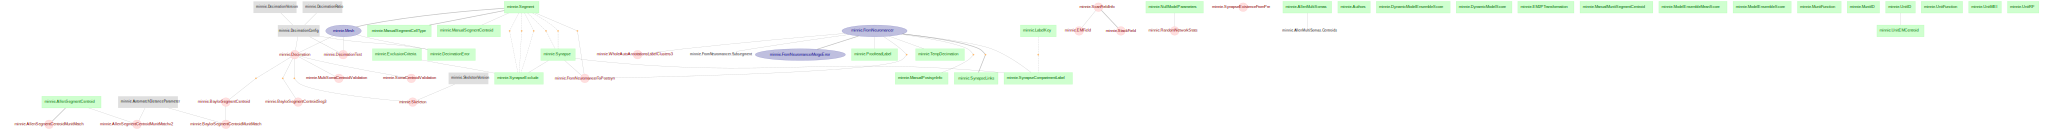

In [12]:
dj.ERD(m65)

In [4]:
#valid_segments = [73192496934525087,73404771398417561,73473215997272920]
seg_with_somas = (minnie.BaylorSegmentCentroidSeg3() & "multiplicity>0").fetch("segment_id")
seg_with_somas
list_of_dict = [dict(segment_id=k) for k in seg_with_somas[:5]]


#(minnie.Decimation() & "segment_id=72489015583974589 OR segment_id=72347797059274433 ")
restricted_table = minnie.Decimation() & list_of_dict
restricted_table

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
73192496934525087,0,0.25,61889,125190,=BLOB=
73404771398417561,0,0.25,46740,93428,=BLOB=
73473215997272920,0,0.25,39500,78948,=BLOB=
73544203216881449,0,0.25,44306,89108,=BLOB=
73548876073768090,0,0.25,82879,169546,=BLOB=


In [5]:
data_fetched = (restricted_table).fetch(as_dict=True)
data_fetched

[{'segment_id': 73192496934525087,
  'version': 0,
  'decimation_ratio': Decimal('0.25'),
  'n_vertices': 61889,
  'n_faces': 125190,
  'mesh': TriangularMesh(segment_id=73192496934525087, version=0, decimation_ratio=0.25, vertices=array([[314572.8, 592073.5, 831701.9],
         [275251.2, 617864.8, 825154.6],
         [283699.2, 620112.8, 827915.9],
         ...,
         [289314.7, 598337.6, 829688.4],
         [358639.5, 628268.2, 838574.6],
         [306210.7, 609517.6, 819990.8]]), faces=array([[37968, 32617, 16530],
         [12957, 55886, 51305],
         [18063, 19585,  2916],
         ...,
         [37602, 13900, 26705],
         [21292,  8650,  3967],
         [52482, 12398, 61551]], dtype=uint32))},
 {'segment_id': 73404771398417561,
  'version': 0,
  'decimation_ratio': Decimal('0.25'),
  'n_vertices': 46740,
  'n_faces': 93428,
  'mesh': TriangularMesh(segment_id=73404771398417561, version=0, decimation_ratio=0.25, vertices=array([[327680. , 682240. , 829580. ],
         [

In [10]:
dict_idx = 1
current_dict = data_fetched[dict_idx]
current_dict["mesh"].vertices,current_dict["mesh"].faces

(array([[327680. , 682240. , 829580. ],
        [349235.2, 666900. , 842736.4],
        [287488. , 665536. , 828860. ],
        ...,
        [316092.3, 674629.5, 826702.2],
        [290185.1, 669874.1, 832459.1],
        [290185.1, 665060.1, 831563.4]]),
 array([[46055, 12316, 18161],
        [ 2852, 15967, 22003],
        [31060, 33074, 12119],
        ...,
        [14545, 15651, 37018],
        [41867, 34082, 24095],
        [ 9714, 41867, 22665]], dtype=uint32))

In [11]:
import skeleton_utils as sk
sk.graph_skeleton_and_mesh(main_mesh_faces=current_dict["mesh"].faces,
                          main_mesh_verts=current_dict["mesh"].vertices)

# Modules for MAP Extraction

In [ ]:
import trimesh
import neuron
import skeleton_utils as sk

In [ ]:
minnie.BaylorSegmentCentroidSeg3()